In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
# import copy
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import pywt
from skimage.filters import rank
from skimage.morphology import disk
from PIL import Image
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import confusion_matrix

In [5]:
input_img_path = r'Input\Image_01L.jpg'
ground_img_path = 'C:\\Users\\utsav\\Desktop\\Output\\Image_01L_2ndHO.png'

In [3]:
def accuracy_func(image1, image2):

    segmented_vessels = image1
    segmented_image = image2

    # Calculate SSIM and PSNR
    ssim_score = ssim(segmented_image, segmented_vessels)
    psnr_score = float('inf')
    mse = np.mean((image1 - image2) ** 2)
    if mse != 0:
        max_pixel = 255.0
        psnr_score = 20 * np.log10(max_pixel / np.sqrt(mse))
    # psnr_score = psnr(segmented_image, segmented_vessels)

    # Convert the images to binary (0 and 255) for calculating accuracy, sensitivity, and specificity
    generated_binary = (segmented_vessels > 0).astype(np.uint8)
    target_binary = (segmented_image > 0).astype(np.uint8)

    # Calculate accuracy, sensitivity, and specificity
    tn, fp, fn, tp = confusion_matrix(target_binary.ravel(), generated_binary.ravel()).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2/((1/specificity)+(1/sensitivity))
    # Print the performance metrics
    print(f'SSIM: {ssim_score:.4f}')
    print(f'PSNR: {psnr_score:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'f1: {f1:.4f}')

In [6]:
inputImage = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(inputImage, 20, 255, cv2.THRESH_BINARY)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
erodedmask = cv2.erode(mask, se, iterations=1)
erodedmask = np.uint8(erodedmask)

# Displaying the eroded mask
# plt.figure()
# plt.imshow(erodedmask, cmap='gray')
# plt.title("Generation of image mask")
# plt.show()

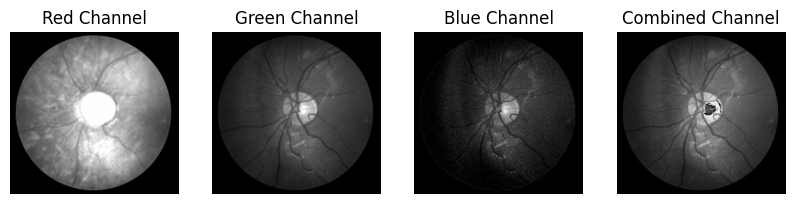

In [7]:
img = Image.open(input_img_path)
img_array = np.array(img)

# Separate the color channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]
combined_channel = green_channel + blue_channel

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(combined_channel, cmap='gray')
plt.title('Combined Channel')
plt.axis('off')

plt.show()

The different channel confirms our hypothesis that green channel exhibits better contrast between the vessels and the background

(array([2.93806e+05, 2.20500e+03, 4.67000e+02, 5.09000e+02, 3.10000e+02,
        5.91000e+02, 8.20000e+02, 1.84200e+03, 2.24900e+03, 8.57600e+03,
        2.30720e+04, 1.90640e+04, 3.02390e+04, 2.26250e+04, 3.49650e+04,
        2.81290e+04, 3.86670e+04, 2.43520e+04, 3.78710e+04, 2.46940e+04,
        3.85240e+04, 3.34080e+04, 2.09040e+04, 2.74580e+04, 1.64050e+04,
        2.37410e+04, 1.49610e+04, 2.02720e+04, 1.19540e+04, 1.66090e+04,
        1.57130e+04, 1.01950e+04, 1.52850e+04, 1.01710e+04, 1.44690e+04,
        8.31800e+03, 1.04120e+04, 5.64700e+03, 6.77500e+03, 3.73200e+03,
        4.28800e+03, 3.24600e+03, 1.78200e+03, 2.18700e+03, 1.17200e+03,
        1.60700e+03, 8.78000e+02, 1.17600e+03, 7.39000e+02, 1.17900e+03,
        1.32200e+03, 8.61000e+02, 1.33800e+03, 7.78000e+02, 1.25400e+03,
        8.47000e+02, 1.13400e+03, 5.48000e+02, 7.42000e+02, 4.63000e+02,
        5.95000e+02, 4.78000e+02, 2.83000e+02, 4.45000e+02, 2.43000e+02,
        3.88000e+02, 2.99000e+02, 4.27000e+02, 3.35

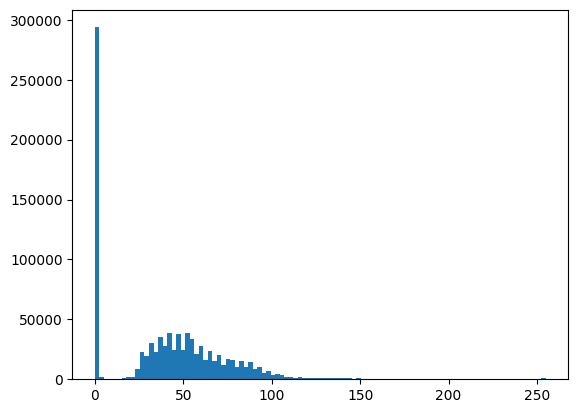

In [8]:
plt.hist(green_channel.flat, bins=100, range=(0, 255))

(array([291689.,   8861.,   4117.,   6708.,   5936.,   7734.,      0.,
          9402.,   9749.,      0.,   9315.,   9254.,  10030.,      0.,
         10955.,      0.,  11385.,      0.,  11240.,  11196.,      0.,
         11208.,      0.,  12561.,      0.,  13876.,      0.,  14253.,
             0.,  13970.,      0.,  12734.,  11963.,      0.,  12076.,
             0.,  12276.,      0.,  12769.,      0.,  12704.,      0.,
         12398.,  12113.,      0.,  12581.,      0.,  12899.,      0.,
         13105.,      0.,  12520.,      0.,  11840.,  11089.,      0.,
         10479.,      0.,  10567.,  10337.,      0.,   9770.,   9184.,
          8504.,      0.,   8279.,   8126.,   8153.,   7855.,   7733.,
          7488.,      0.,  14538.,      0.,  13207.,      0.,  11954.,
          5640.,   5492.,   5477.,  10573.,   5140.,   5151.,  10265.,
          5064.,   5000.,   5135.,  10031.,   4845.,   8929.,   7642.,
          6788.,   8079.,   6198.,   7308.,   5416.,   8281.,   5121.,
      

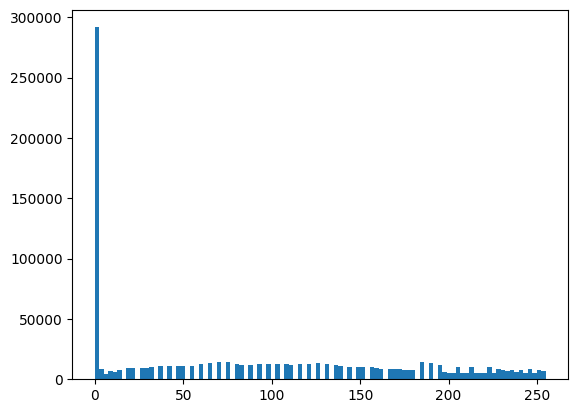

In [9]:
equ = cv2.equalizeHist(green_channel) #Explain what it does
plt.hist(equ.flat, bins=100, range=(0, 255))

(array([1.1000e+01, 1.5200e+02, 3.1350e+03, 2.8410e+05, 3.8690e+03,
        6.1310e+03, 2.4440e+03, 2.6940e+03, 1.8940e+03, 3.1750e+03,
        3.7240e+03, 2.8520e+03, 4.4250e+03, 3.0660e+03, 4.9690e+03,
        3.5910e+03, 5.6920e+03, 4.0550e+03, 6.4500e+03, 4.9510e+03,
        7.8040e+03, 8.7770e+03, 6.4640e+03, 1.0400e+04, 7.2770e+03,
        1.2162e+04, 8.6180e+03, 1.3211e+04, 9.0700e+03, 1.5016e+04,
        1.4869e+04, 1.0407e+04, 1.5808e+04, 1.0974e+04, 1.6351e+04,
        1.1028e+04, 1.7072e+04, 1.1232e+04, 1.7031e+04, 1.1636e+04,
        1.7421e+04, 1.7622e+04, 1.1779e+04, 1.7368e+04, 1.1359e+04,
        1.7263e+04, 1.0921e+04, 1.6334e+04, 1.0562e+04, 1.5572e+04,
        1.5031e+04, 9.4280e+03, 1.3915e+04, 9.0980e+03, 1.2841e+04,
        8.2450e+03, 1.1860e+04, 7.4970e+03, 1.0674e+04, 6.9820e+03,
        9.5520e+03, 8.9790e+03, 5.5790e+03, 7.9770e+03, 4.8610e+03,
        6.9620e+03, 4.5140e+03, 5.9460e+03, 3.8160e+03, 5.2270e+03,
        4.9050e+03, 3.0250e+03, 4.1030e+03, 2.48

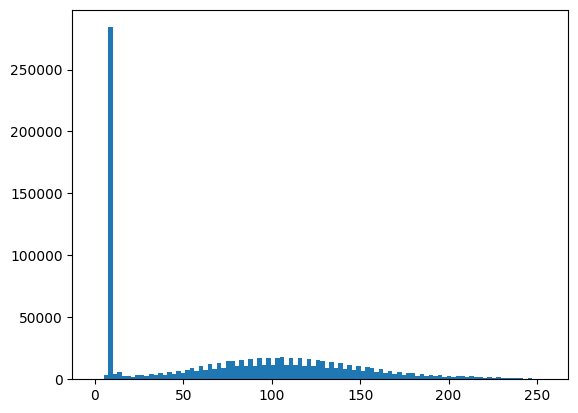

In [10]:
clahe = cv2.createCLAHE(clipLimit = 8, tileGridSize=(8,8))
cl_img = clahe.apply(green_channel)
plt.hist(cl_img.flat, bins=100, range=(0, 255))

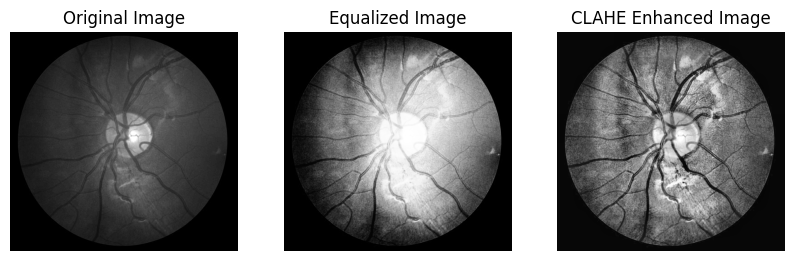

In [11]:
plt.figure(figsize=(10, 5))

# Plot the red channel
plt.subplot(1, 3, 1)
plt.imshow(green_channel, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the green channel
plt.subplot(1, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cl_img, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.show()

The histogram is highly tilted towards left, and therefore there is a need to equalize it. It improves but still the data is noisy so we try to do CLAHE (local contrasting)

After applying CLAHE, we can see the pixel plot is evenly distributed whilst not capturing noise as was the case for equalizing image. And therefore it improves contrast much effieciently.

Here best result were using adaptive thresholding cause:
Adaptive thresholding is useful when the lighting conditions are uneven or the image has varying background intensities. It calculates the threshold for each pixel based on the local neighbourhood of the pixel, which can improve the accuracy and robustness of image processing algorithms.

In [12]:
def replace_black_ring(im_enh, im_mask):
    row, col = im_mask.shape
    area_sum = np.zeros((50, 50))

    posit = np.ceil((np.random.rand(3, 2) + 1) * 1 / 3 * min(row, col)).astype(int)

    for i in range(3):
        x = posit[i, 0]
        y = posit[i, 1]
        area_rand = im_enh[x - 25:x + 25, y - 25:y + 25]  # Select the background
        area_sum = area_sum + area_rand

    area_sum = area_sum * 1 / 3

    mean_val = np.mean(area_sum)  # Calculate the mean of the array
    mean_mask = np.logical_not(im_mask) * mean_val  # Generate a new background
    im_new = mean_mask + im_enh * im_mask  # Overlay background

    return im_new, mean_val

im_new , lose = replace_black_ring(cl_img,erodedmask)
im_new = 255-im_new

# fig = plt.figure(figsize=(10, 5))
# plt.imshow(im_new,cmap='gray')
# plt.title('Replaced Black Ring')

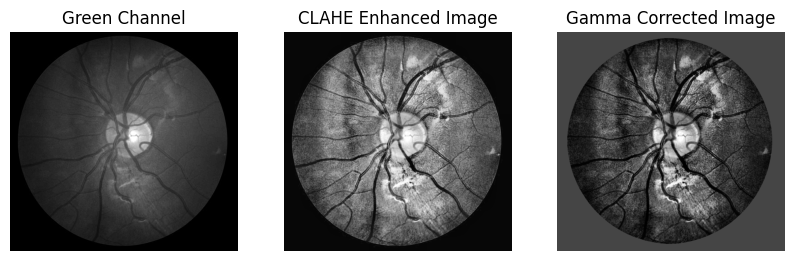

In [13]:
gamma = 1.8

# Apply gamma correction
gc_image = np.power(im_new/float(np.max(green_channel)), gamma)
gc_image = np.uint8(gc_image * 255)

plt.figure(figsize=(10, 5))

# Plot the red channel
plt.subplot(1, 3, 1)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Plot the green channel
plt.subplot(1, 3, 2)
plt.imshow(cl_img, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gc_image, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()

In [14]:
def display_images(images, title):
    num_images = len(images)
    plt.figure(figsize=(12, 6))
    for idx, lol in enumerate(images):
        plt.subplot(1, num_images, idx + 1)
        plt.imshow(lol, cmap='gray')
        plt.title(f'{title} Image {idx + 1}')
        plt.axis('off')
    plt.show()

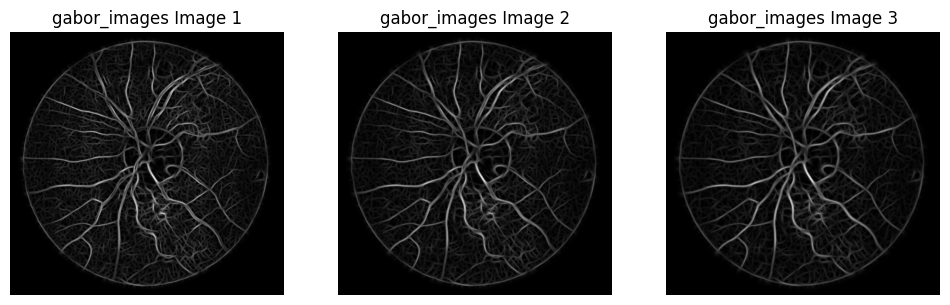

In [15]:
def gabor_kernel(wavelength, orientation, sigma, aspect_ratio):
    n_sigma = 2.5 * sigma / aspect_ratio
    n = int(np.floor(n_sigma))  # Size of the Gabor filter kernel

    x, y = np.meshgrid(range(-n, n + 1), range(-n, n + 1))
    y = -y  # Change the direction of y

    f = 2 * np.pi / wavelength
    b = 1 / (2 * sigma**2)
    a = b / np.pi

    xp = x * np.cos(orientation) + y * np.sin(orientation)
    yp = -x * np.sin(orientation) + y * np.cos(orientation)

    cos_func = np.cos((f * xp) - np.pi)
    kernel = a * np.exp(-b * (xp**2 + (aspect_ratio**2 * yp**2))) * cos_func

    # Normalize the kernel
    pos = np.sum(kernel[kernel > 0])
    neg = np.sum(np.abs(kernel[kernel < 0]))

    kernel[kernel > 0] /= pos
    kernel[kernel < 0] /= neg

    return kernel

def apply_gabor(image, wavelengths, number_of_orientations, aspect_ratio, bandwidth):
    slratio = (1 / np.pi) * np.sqrt(np.log(2) / 2.0 * ((2 ** bandwidth + 1) / (2 ** bandwidth - 1)))

    gabor_images = []
    for wavelength in wavelengths:
        sigma = slratio * wavelength
        accumulated_img = np.zeros_like(image, dtype=np.float32)

        for orientation_idx in range(number_of_orientations):
            orientation = (np.pi / number_of_orientations) * orientation_idx
            kernel = gabor_kernel(wavelength, orientation, sigma, aspect_ratio)
            filtered_img = cv2.filter2D(image, cv2.CV_32F, kernel)
            accumulated_img = np.maximum(accumulated_img, filtered_img, accumulated_img)

        # reduced_img = reduce_central_ring(accumulated_img)
        gabor_images.append(accumulated_img)

    return gabor_images

# Parameters
wavelengths = [13,15,17]
number_of_orientations = 24
aspect_ratio = 0.5
bandwidth = 1

# Apply Gabor filter to a single channel and obtain three images
gabor_images = apply_gabor(im_new, wavelengths, number_of_orientations, aspect_ratio, bandwidth)
display_images(gabor_images, 'gabor_images')

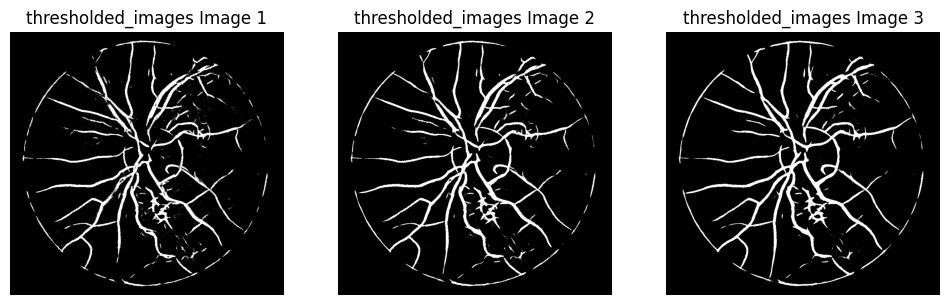

In [16]:
def automatic_threshold(image):
    # Calculate histogram of pixel intensities
    histogram, _ = np.histogram(image.flatten(), bins=np.arange(257))

    # Calculate the ratio of each intensity
    image_size = image.size
    ratios = histogram / image_size

    # Calculate the product of each intensity and its ratio and sum them up
    threshold_value = np.sum(np.arange(len(ratios)) * ratios) + 15.5

    #print(threshold_value)

    return threshold_value

def apply_threshold(gabor_images):
    binary_images = []
    for lol in gabor_images:
        # Apply Laplace filter
        laplacian_img = cv2.Laplacian(lol, cv2.CV_32F)

        # Add the Laplacian image to the original Gabor image
        combined_img = cv2.add(lol, laplacian_img)

        # Determine threshold value using the automatic thresholding method
        threshold_value = automatic_threshold(combined_img)

        # Apply threshold
        _, binary_img = cv2.threshold(combined_img, threshold_value, 255, cv2.THRESH_BINARY)

        binary_images.append(binary_img)

    return binary_images

thresholded_images = apply_threshold(gabor_images)
display_images(thresholded_images, 'thresholded_images')
gabor = thresholded_images[2]

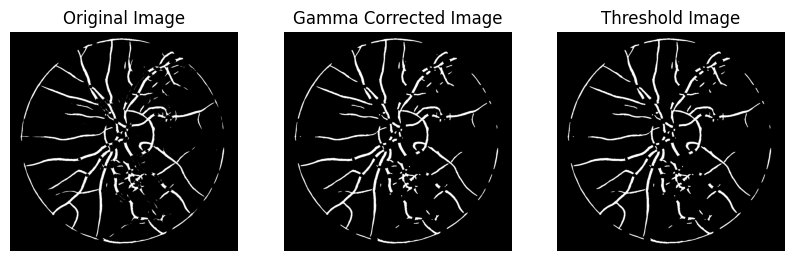

In [17]:
#morphological operations, Here we do opening then closing
clahe_img  = gabor.astype(np.uint8)

cell_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
Topen = cv2.morphologyEx(clahe_img,cv2.MORPH_OPEN,cell_disc)
Tclose = cv2.morphologyEx(Topen, cv2.MORPH_CLOSE, cell_disc)

tophat_img = (clahe_img - Tclose)#.astype(np.uint8)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
bottomhat_img = cv2.erode(tophat_img, kernel)
bottomhat_img = cv2.dilate(bottomhat_img, kernel)

plt.figure(figsize=(10, 5))

# Plot the red channel
plt.subplot(1, 3, 1)
plt.imshow(tophat_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the green channel
plt.subplot(1, 3, 2)
plt.imshow(bottomhat_img, cmap='gray')
plt.title('Gamma Corrected Image')
plt.axis('off')

ret, thresh = cv2.threshold(bottomhat_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(1, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.axis('off')

plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_5916\1354022272.py:2: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  HessThin = hessian_matrix(gabor, sigma=1.2, order='rc')
C:\Users\utsav\AppData\Local\Temp\ipykernel_5916\1354022272.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  HessWide = hessian_matrix(gabor, sigma=4, order='rc')


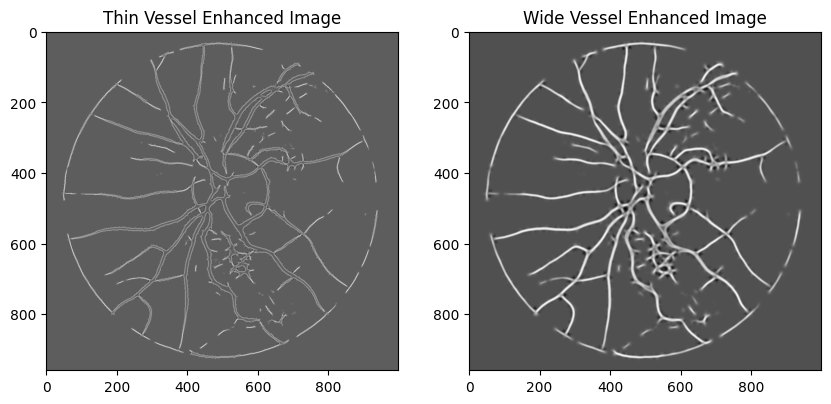

In [18]:
#hessian matrix and eigenvalues approach to get thin vessel enhanced image
HessThin = hessian_matrix(gabor, sigma=1.2, order='rc')
EignThin = hessian_matrix_eigvals(HessThin) [1]
HessWide = hessian_matrix(gabor, sigma=4, order='rc')
EignWide = hessian_matrix_eigvals(HessWide) [1]
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Thin Vessel Enhanced Image")
plt.imshow(1-EignThin, cmap=plt.cm.gray)
plt.subplot(122)
plt.title("Wide Vessel Enhanced Image")
plt.imshow(1-EignWide, cmap='gray')

In [19]:
def GlobalOtsu(img):
    foreground = img[img>=0]
    background = img[img<0]
    
    final_var = (np.var(foreground) * len(foreground) + np.var(background) * len(background))/(len(foreground) + len(background))
    if(np.isnan(final_var)):
        final_var = -1
        
    final_thresh = 0
    for i in np.linspace(np.min(img), np.max(img), num=255):
        foreground = img[img>=i]
        background = img[img<i]
        var = (np.var(foreground) * len(foreground) + np.var(background) * len(background))/(len(foreground) + len(background))
        
        if(np.isnan(var)):
            var = -1
            
        if(var!=-1 and (var<final_var or final_var ==-1)):
            final_var = var
            final_thresh = i
    ret, thresholded = cv2.threshold(img, final_thresh, 255, cv2.THRESH_BINARY)
    return thresholded

In [20]:
def AreaThreshold(img, area = 5):
    #Area based thresholding/cleaning. Done as postprocessing step
    nlabels,labels,stats,centroid = cv2.connectedComponentsWithStats(np.uint8(img), 4, cv2.CV_32S)

    output = np.copy(img)
    
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            if stats[labels[i][j], cv2.CC_STAT_AREA] < area:
                output[i][j] = 0
                
    return output

In [21]:
def LocalOtsu1(img,radius = 5):
    selem = disk(radius)

    local_otsu = rank.otsu(img, selem)
    output = np.copy(img)
    
    output[output < local_otsu] = 0
    output[output >= local_otsu] = 255
    
    return output

In [22]:
def LocalOtsu2(img,radius = 15):
    selem = disk(radius)

    local_otsu = rank.otsu(img, selem)
    output = np.copy(img)
    rng = local_otsu.max() - local_otsu.min()
    mid = rng/2 + local_otsu.min()

    local_otsu[local_otsu<mid] = mid

    output[output < local_otsu] = 0

    return output

In [23]:
def image_fusion(img1,img2):
    w1 = pywt.wavedec2(img1, 'db1')
    w2 = pywt.wavedec2(img2, 'db1')
    elem = (w1[0]+w2[0])/2
    fw = [elem]
    
    for i in range(len(w1)-1):
        x,y,z = (w1[i+1][0] + w2[i+1][0])/2, (w1[i+1][1] + w2[i+1][1])/2, (w1[i+1][2] + w2[i+1][2])/2
        fw.append((x,y,z))

    output = pywt.waverec2(fw, 'db1')
    
    amin = np.min(output)
    amax = np.max(output)
    output = 255* ((output - amin)/(amax-amin))
    
    output = cv2.resize(output,img1.T.shape)
    return output

c:\Users\utsav\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\utsav\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\utsav\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


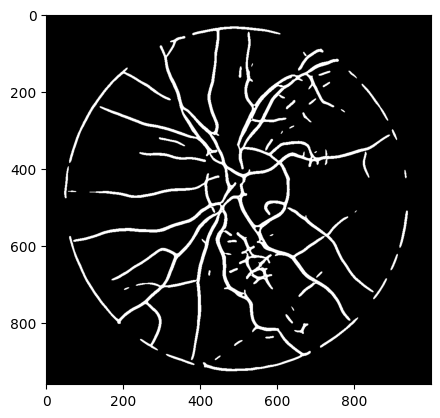

In [24]:
#Global otsu thresholding
val1 = GlobalOtsu(1-EignWide)
#normalising the images for further processing
thinN = cv2.normalize(1-EignThin,  None, 0, 255, cv2.NORM_MINMAX)
val1 = cv2.normalize(val1,  None, 0, 70, cv2.NORM_MINMAX)
val1 = val1.astype(np.uint8)
plt.imshow(val1,cmap='gray')

In [26]:
val1[val1!=0] = 255
ground_img_path = 'Output\Image_01L_1stHO.png'
segmented_vessels = val1
segmented_image = np.array(Image.open(ground_img_path))
segmented_image = segmented_image.astype(np.uint8)
accuracy_func(segmented_image,segmented_vessels)

SSIM: 0.8341
PSNR: 54.2698
Accuracy: 0.9473
Sensitivity: 0.6092
Specificity: 0.9760
f1: 0.7502


Text(0.5, 1.0, 'Local Otsu Thresholding')

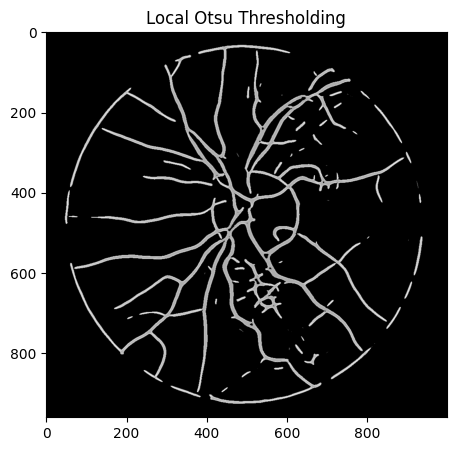

In [27]:
test1 = image_fusion(val1,thinN)
lOtsu = LocalOtsu2(test1.astype('uint8'))
fig = plt.figure(figsize=(10, 5))
plt.imshow(lOtsu,cmap='gray')
plt.title("Local Otsu Thresholding")

Text(0.5, 1.0, 'Final Output')

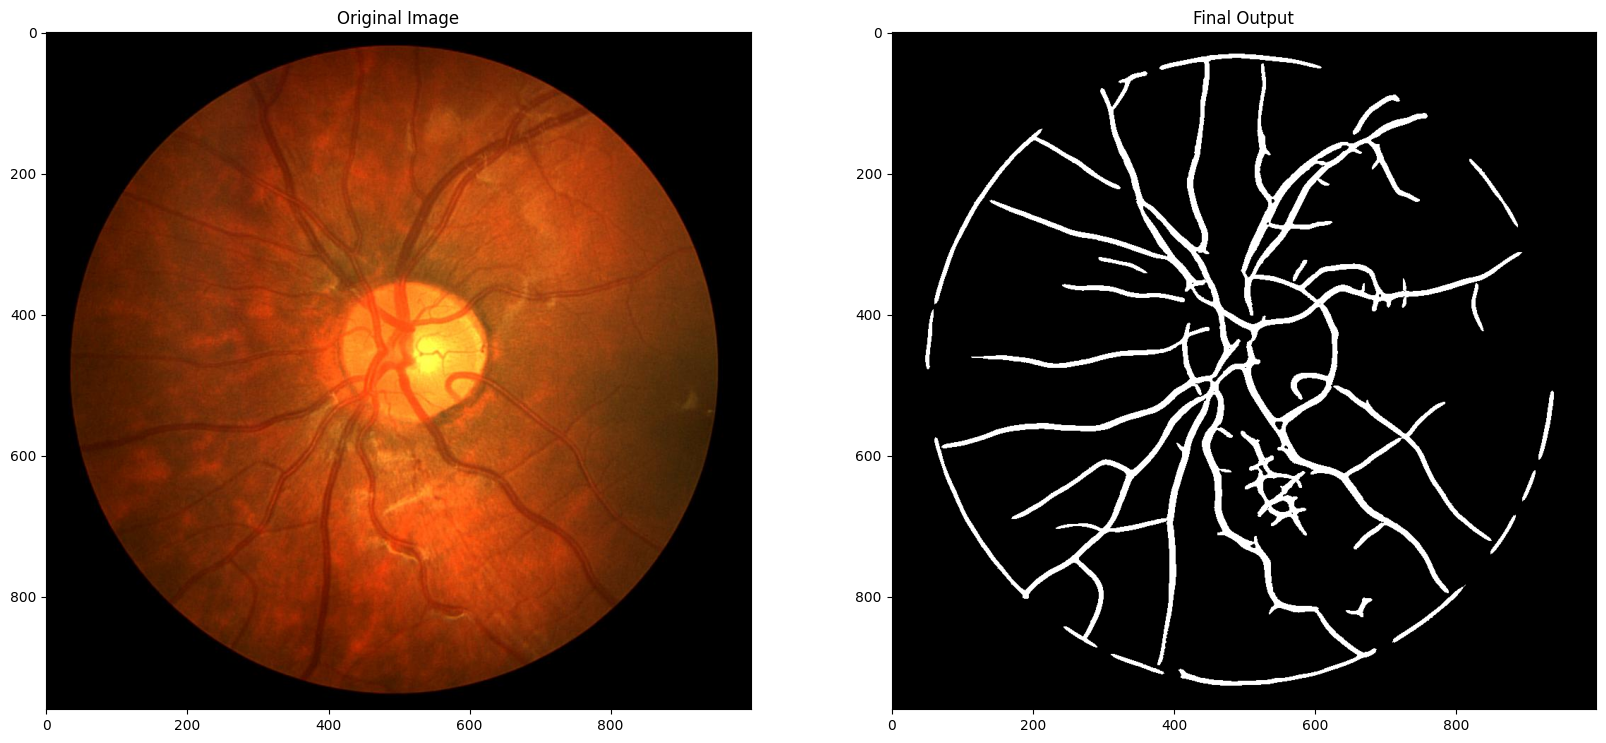

In [28]:
final = AreaThreshold(lOtsu,200)
final[final!=0] = 255

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
fig.add_subplot(1, 2, 2)
plt.imshow(final,cmap='gray')
plt.title("Final Output")

In [29]:
segmented_vessels = final
segmented_image = np.array(Image.open(ground_img_path))
segmented_image = segmented_image.astype(np.uint8)
accuracy_func(segmented_image,segmented_vessels)

SSIM: 0.8405
PSNR: 54.2606
Accuracy: 0.9487
Sensitivity: 0.6186
Specificity: 0.9766
f1: 0.7574
